In [4]:
%matplotlib notebook

from k_means import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cv2
from skimage import io
import time

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<IPython.core.display.Javascript object>


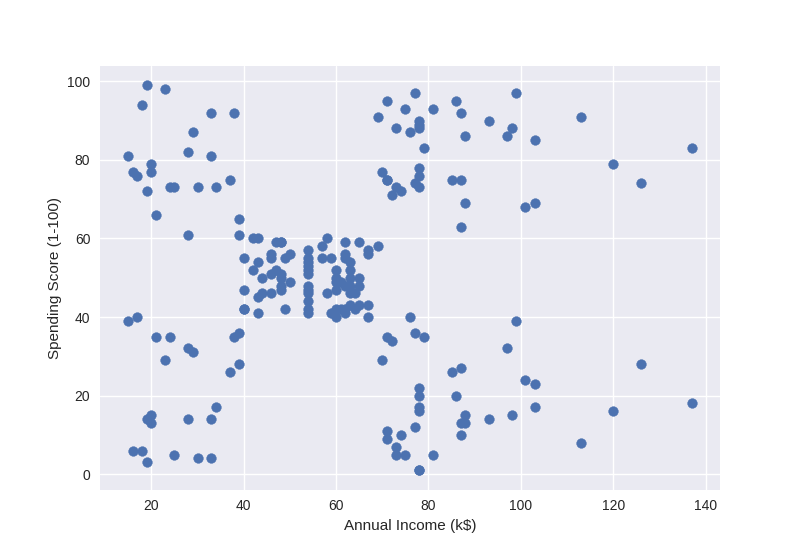

Text(0, 0.5, 'Spending Score (1-100)')

In [7]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [8]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 5, runs = 500)
(clusters, data_with_clusters) = model.fit(X)

In [9]:
model.cost_

2602.972578838644

<IPython.core.display.Javascript object>


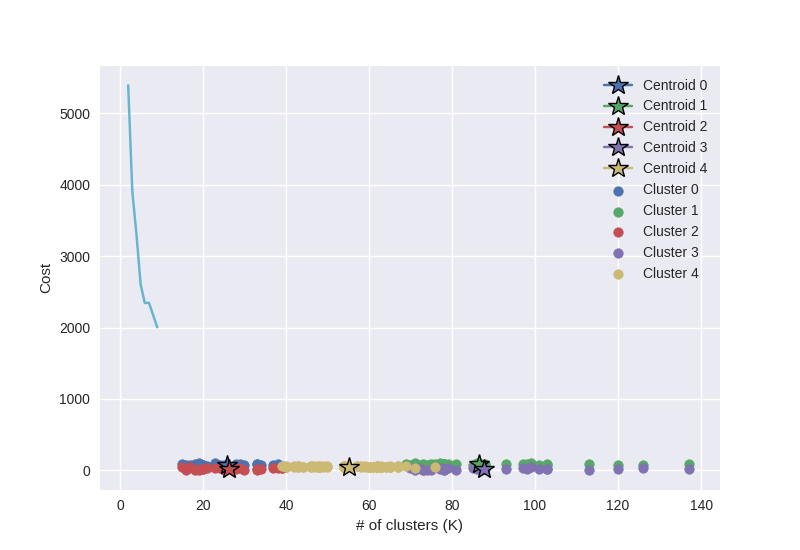

In [10]:
plt.close()
for i, cluster_mean in enumerate(clusters):
    data_cluster_i = data_with_clusters[ data_with_clusters[:, -1] == i ]
    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

In [11]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 5, runs = 100)
(clusters, data_with_clusters) = model.fit(X)

<IPython.core.display.Javascript object>


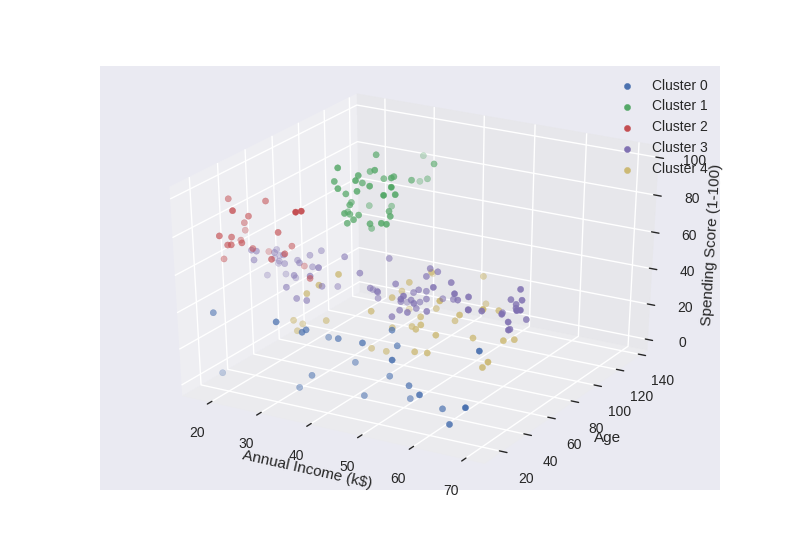

In [13]:
fig = plt.figure()
ax = plt.axes(projection="3d")
for i, cluster_mean in enumerate(clusters):
    data_cluster_i = data_with_clusters[ data_with_clusters[:, -1] == i ]
    ax.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], data_cluster_i[:, 2], label = 'Cluster ' + str(i))
    #ax.scatter(cluster_mean[0], cluster_mean[1], cluster_mean[2], label = 'Centroid ' + str(i), marker='*')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Age')
    ax.set_zlabel('Spending Score (1-100)')
    ax.legend()

<IPython.core.display.Javascript object>


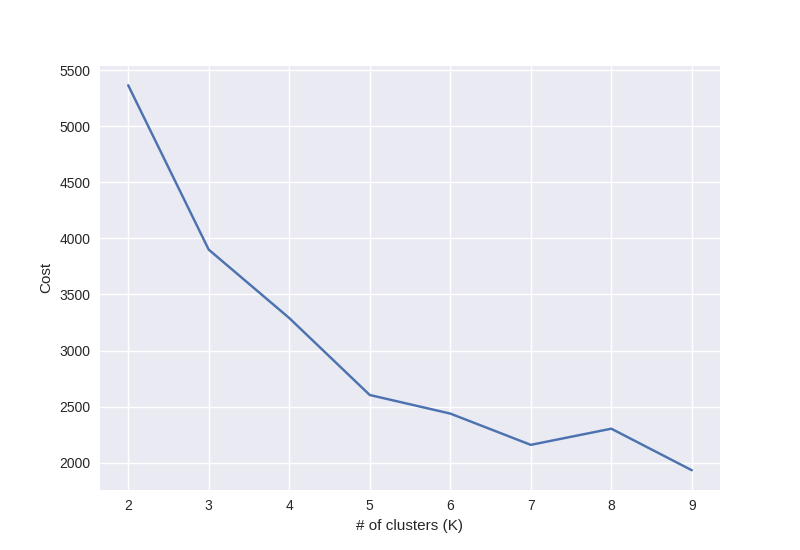

Text(0, 0.5, 'Cost')

In [19]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

costs = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    costs.append(model.cost_)
    

plt.close()
plt.plot(list(range(2, 10)), costs)
plt.xlabel("# of clusters (K)")
plt.ylabel("Cost")

In [21]:
# OPENCV

cat_img_orig = cv2.imread('sleeping_cats.jpg')

#cv2.imwrite('sleeping_cats_again.png', cat_img_orig, [int(cv2.IMWRITE_PNG_COMPRESSION), 80])


cat_img_orig = cv2.cvtColor(cat_img_orig, cv2.COLOR_BGR2RGB)
cat_img_shape = cat_img_orig.shape
# Convert 3d image array to 2d array
cat_img_orig = cat_img_orig / 255
cat_img = cat_img_orig.reshape(-1, 3)

cat_img_shape

(423, 640, 3)

In [22]:
model = KMeans(n_clusters=16)

cluster_means, image_data_with_clusters = model.fit(cat_img)

In [23]:
compressed_image = np.zeros(cat_img.shape)
for i, cluster in enumerate(image_data_with_clusters[:, -1]):
    compressed_image[i, :] = cluster_means[ int(cluster) ]

In [24]:
compressed_image.shape

(270720, 3)

In [25]:
compressed_image_reshaped = compressed_image.reshape(cat_img_shape)

In [26]:
compressed_image_reshaped.shape

(423, 640, 3)

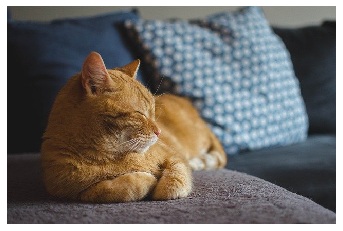

In [27]:
%matplotlib inline
plt.close()
plt.axis('off')
plt.imshow(cat_img_orig)

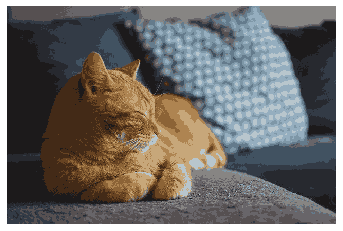

In [28]:
plt.close()
plt.axis('off')
plt.imshow(compressed_image_reshaped)

In [29]:
# SCIKIT IMAGE

In [9]:
def compress_by_k_means(image_name, compressed_image_name, n_clusters = 8):
    start = time.time()
    
    image = io.imread(image_name)
    orig_shape = image.shape
    image = image.reshape(-1, image.shape[2]) / 255
    img_shape = image.shape
    
    
    
    model = KMeans(n_clusters=n_clusters)

    cluster_means, image_data_with_clusters = model.fit(image)
    
    compressed_image = np.zeros(img_shape)

    for i, cluster in enumerate(image_data_with_clusters[:, -1]):
        compressed_image[i, :] = cluster_means[ int(cluster) ]
        
    compressed_image = compressed_image * 255
    compressed_image_reshaped = compressed_image.reshape(orig_shape).astype('uint8')
    io.imsave(compressed_image_name, compressed_image_reshaped)
    
    end = time.time()
    
    print('Compressed in', end-start, 'seconds')

In [13]:
image_name = 'karakoy.jpg'
compressed_image_name = 'karakoy_comp.jpg'

compress_by_k_means(image_name, compressed_image_name, n_clusters=8)

Compressed in 3.4521703720092773 seconds


In [14]:
compress_by_k_means('dog.jpg', 'dog_comp.jpg', n_clusters=16)

Compressed in 32.6217679977417 seconds


In [11]:
compress_by_k_means('wolf.jpg', 'wolf_comp.jpg', n_clusters=16)

Compressed in 38.67040753364563 seconds


In [12]:
compress_by_k_means('rabbit.jpg', 'rabbit_comp.jpg', n_clusters=8)

Compressed in 35.07638335227966 seconds
